In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [79]:
#The dataset is already split into training and test sets, but need to make a validation set as well.
#The neural network is going to be trained using Gradient Descent, so input features need to be scaled too.
#Since pixel values are ints from 0-255, just scale them in the range of 0-1 by dividing by 255.0, making them floats

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_train[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [80]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
y_train[0]

4

In [81]:
#Simplest keras model for NN composed of a single stack of sequentially connected layers
model = keras.models.Sequential()
#Next, add a Flatten layer that converts each input image into a 1D array. 
#Add a Dense layer with 300 neurons that uses ReLU (Rectified Linear Unit) activation function. 
#Add a second Dense layer with 100 neurons, also using ReLU activation function.
#Add a Dense output layer with 10 neurons (1 per class) using softmax activation function since classes are exclusive
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [82]:
#Compile model to specify loss function and optimizer to use. 
#Use sparse_categorical_crossentropy because we have sparse labels, ie each training example has one target class index.
#sgd is stochasitc gradient descent.
#Since we're building a classifier, it's most appropriate to measure its accuracy during training and evaluation.
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=["accuracy"])

In [85]:
#Train the model
history = model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3775 - accuracy: 0.8666 - val_loss: 0.3773 - val_accuracy: 0.8642
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3642 - accuracy: 0.8716 - val_loss: 0.3687 - val_accuracy: 0.8686
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3520 - accuracy: 0.8762 - val_loss: 0.3749 - val_accuracy: 0.8700
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3431 - accuracy: 0.8778 - val_loss: 0.3614 - val_accuracy: 0.8758
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3330 - accuracy: 0.8825 - val_loss: 0.3425 - val_accuracy: 0.8774
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3248 - accuracy: 0.8839 - val_loss: 0.3351 - val_accuracy: 0.8822
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3166 - accuracy: 0.8881 - val_loss: 0.3538 - val_accuracy:

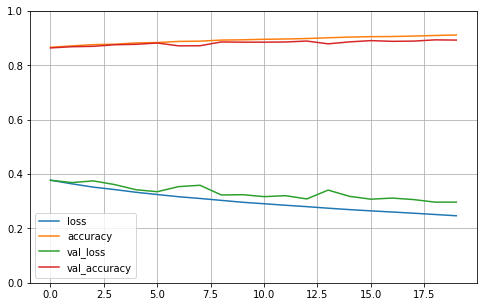

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()